In [8]:
import sys
print(f"Stdout encoding: {sys.stdout.encoding}")

Stdout encoding: UTF-8


In [9]:
!python --version
!pip --version

Python 3.12.3
pip 24.0 from C:\Users\1neon\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip (python 3.12)



In [10]:
!pip install numpy


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
!pip install matplotlib


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
!pip install scikit-learn


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
# Импорт библиотек
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

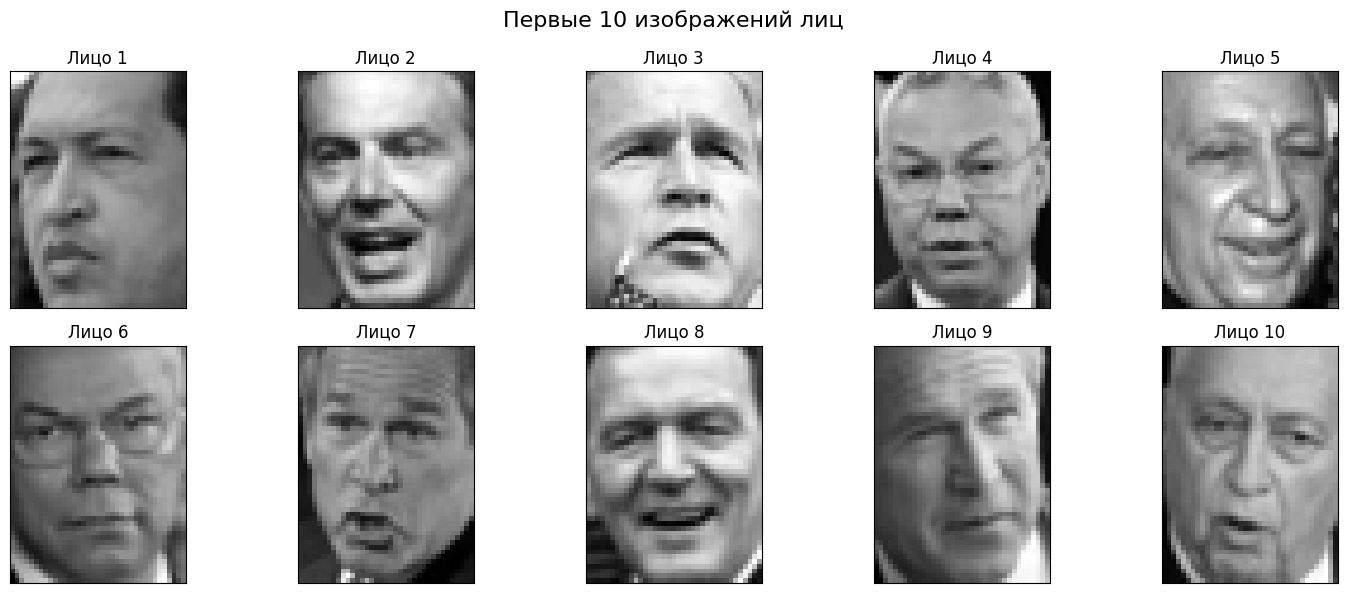

In [14]:
# 1. Получение данных
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
X = lfw_people.data
n_samples, h, w = lfw_people.images.shape

# Визуализация первых 10 изображений
plt.figure(figsize=(15, 6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(lfw_people.images[i], cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.title(f"Лицо {i+1}")
plt.suptitle('Первые 10 изображений лиц', fontsize=16)
plt.tight_layout()
plt.show()

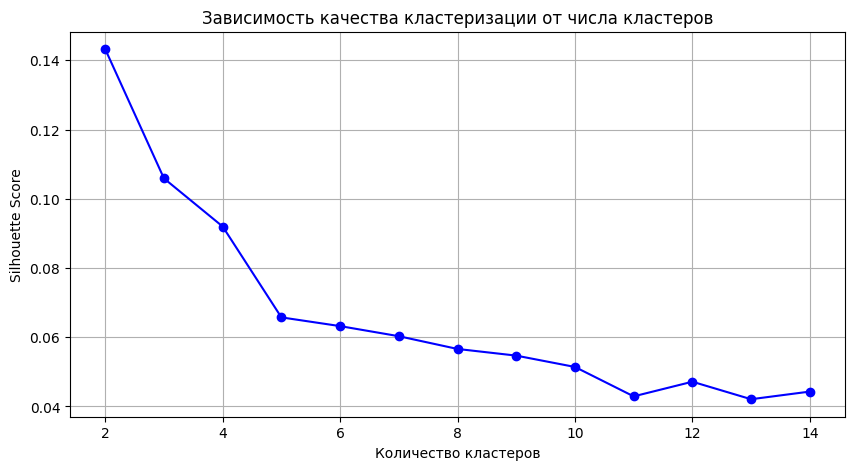

Оптимальное число кластеров: 2


In [15]:
# 2. Кластеризация и оценка качества

# Нормализация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Определение оптимального числа кластеров
range_n_clusters = range(2, 15)
silhouette_scores = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, cluster_labels))

# Визуализация метрик
plt.figure(figsize=(10, 5))
plt.plot(range_n_clusters, silhouette_scores, 'bo-')
plt.xlabel('Количество кластеров')
plt.ylabel('Silhouette Score')
plt.title('Зависимость качества кластеризации от числа кластеров')
plt.grid()
plt.show()

# Выбор оптимального числа кластеров
optimal_clusters = range_n_clusters[np.argmax(silhouette_scores)]
print(f"Оптимальное число кластеров: {optimal_clusters}")

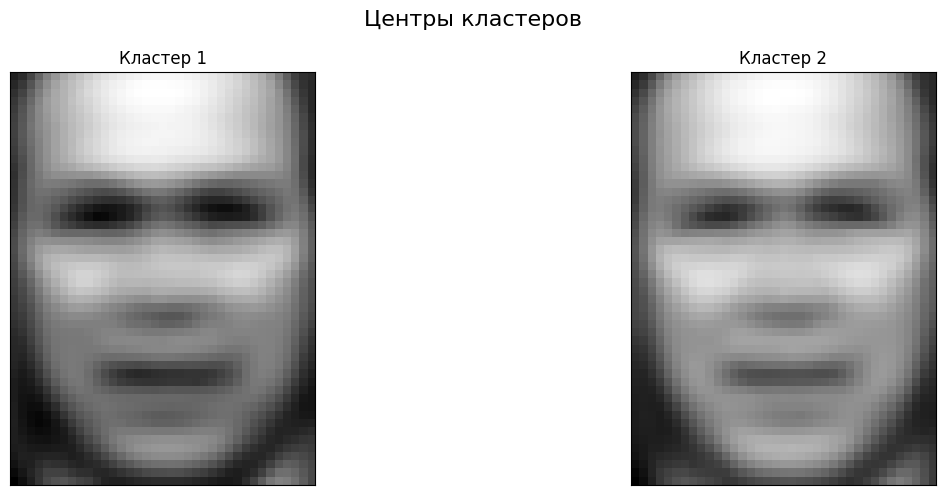

In [16]:
# Кластеризация с оптимальным числом кластеров
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)

# Визуализация центров кластеров
centers = scaler.inverse_transform(kmeans.cluster_centers_)

plt.figure(figsize=(15, 5))
for i in range(optimal_clusters):
    plt.subplot(1, optimal_clusters, i+1)
    plt.imshow(centers[i].reshape((h, w)), cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.title(f"Кластер {i+1}")
plt.suptitle('Центры кластеров', fontsize=16)
plt.tight_layout()
plt.show()

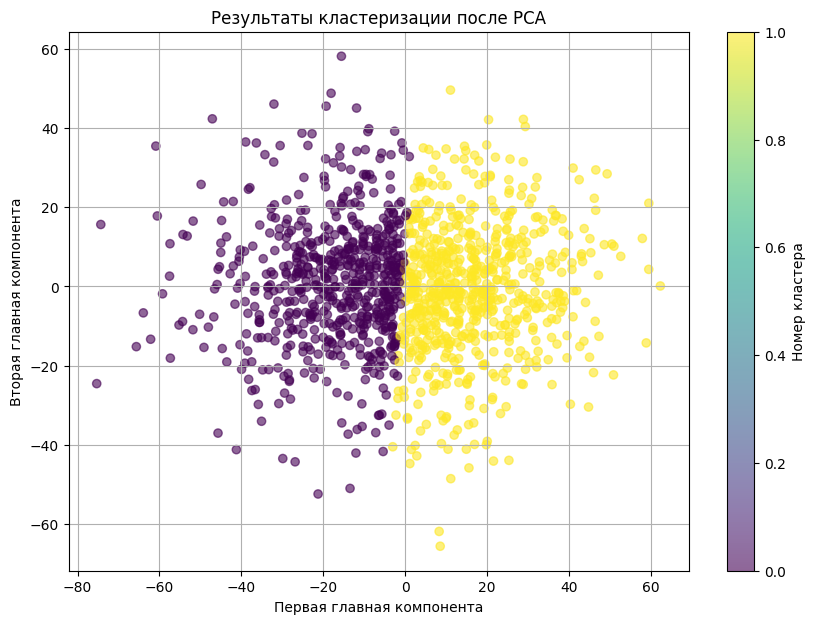

In [17]:
# 3. Снижение размерности признакового пространства
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Визуализация в 2D пространстве
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', alpha=0.6)
plt.colorbar(label='Номер кластера')
plt.title('Результаты кластеризации после PCA')
plt.xlabel('Первая главная компонента')
plt.ylabel('Вторая главная компонента')
plt.grid()
plt.show()

Выводы по проделанной работе:
Была успешно выполнена загрузка и предварительная визуализация данных лиц.

Методом k-means проведена кластеризация изображений лиц, определено оптимальное количество кластеров (на основе silhouette score).

Центры кластеров визуализированы и могут быть интерпретированы как "усредненные лица" для каждого кластера.

Снижение размерности с помощью PCA позволило визуализировать распределение данных в двумерном пространстве и подтвердить результаты кластеризации.

Основные улучшения могут быть связаны с более глубоким анализом результатов и добавлением дополнительных метрик оценки качества кластеризации.